# Import the Lib 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
data_set="/kaggle/input/company-employees/Employees.xlsx"
df=pd.read_excel(data_set)
df

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,685,Sari,Hanna,Male,2020-05-26,0,Marketing,Lebanon,South,1452,17424,2.0,0,3,1
685,686,Eubayda,Kayd,Male,2020-06-03,0,Facilities/Engineering,Egypt,North,3237,38844,3.0,1,0,4
686,687,Khalil,Alkalu,Male,2017-07-11,3,Facilities/Engineering,Egypt,North,2819,33828,5.0,0,0,0
687,688,Muhamad,Shrbjy,Male,2018-05-30,2,Creative,Egypt,North,2069,24828,3.0,0,0,10


# Basic checks

In [3]:
df.shape

(689, 15)

In [4]:
df.dtypes

No                         int64
First Name                object
Last Name                 object
Gender                    object
Start Date        datetime64[ns]
Years                      int64
Department                object
Country                   object
Center                    object
Monthly Salary             int64
Annual Salary              int64
Job Rate                 float64
Sick Leaves                int64
Unpaid Leaves              int64
Overtime Hours             int64
dtype: object

# drop the unwanted  Columns 

In [5]:
df.drop('No',axis=1,inplace=True)

In [6]:
df.head(3)

,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


# Adding the First Name and Last Name 

In [7]:
df['Name']=df['First Name']+" "+df['Last Name']

In [8]:
df.head(3)

,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Name
0,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183,Ghadir Hmshw
1,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198,Omar Hishan
2,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192,Ailya Sharaf


# Drop the First Name and Last Name

In [9]:
df.drop(columns=['First Name','Last Name'],inplace=True)

In [10]:
df.head(3)

,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Name
0,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183,Ghadir Hmshw
1,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198,Omar Hishan
2,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192,Ailya Sharaf


In [11]:
df.dtypes

Gender                    object
Start Date        datetime64[ns]
Years                      int64
Department                object
Country                   object
Center                    object
Monthly Salary             int64
Annual Salary              int64
Job Rate                 float64
Sick Leaves                int64
Unpaid Leaves              int64
Overtime Hours             int64
Name                      object
dtype: object

# Convert to Datetime to objects 

In [12]:
df['Start Date']=df['Start Date'].dt.date

# Statistical Analysis 

In [13]:
df.describe(include='object')

,Gender,Start Date,Department,Country,Center,Name
count,689,689,689,689,689,689
unique,2,539,20,5,5,675
top,Male,2018-04-04,Manufacturing,Egypt,Main,Muhamad Khayr
freq,449,3,140,379,251,3


In [14]:
a1=df.describe(include='object').columns
a1


cat_d=df[['Gender', 'Start Date', 'Department', 'Country', 'Center', 'Name']]
cat_d

,Gender,Start Date,Department,Country,Center,Name
0,Male,2018-04-04,Quality Control,Egypt,West,Ghadir Hmshw
1,Male,2020-05-21,Quality Control,Saudi Arabia,West,Omar Hishan
2,Female,2017-09-28,Major Mfg Projects,Saudi Arabia,West,Ailya Sharaf
3,Male,2018-08-14,Manufacturing,United Arab Emirates,Main,Lwiy Qbany
4,Male,2020-03-11,Manufacturing,Egypt,Main,Ahmad Bikri
...,...,...,...,...,...,...
684,Male,2020-05-26,Marketing,Lebanon,South,Sari Hanna
685,Male,2020-06-03,Facilities/Engineering,Egypt,North,Eubayda Kayd
686,Male,2017-07-11,Facilities/Engineering,Egypt,North,Khalil Alkalu
687,Male,2018-05-30,Creative,Egypt,North,Muhamad Shrbjy


In [15]:
cat_d.dtypes

Gender        object
Start Date    object
Department    object
Country       object
Center        object
Name          object
dtype: object

In [16]:
df.describe(exclude='object')

,Years,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,1.476052,2068.201742,24818.420900,3.586357,1.609579,0.759071,13.702467
std,1.190963,763.289240,9159.470878,1.350125,2.196051,1.647764,25.692049
min,0.000000,703.000000,8436.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1436.000000,17232.000000,3.000000,0.000000,0.000000,3.000000
50%,1.000000,2077.000000,24924.000000,3.000000,0.000000,0.000000,7.000000
75%,2.000000,2682.000000,32184.000000,5.000000,3.000000,0.000000,10.000000
max,5.000000,3450.000000,41400.000000,5.000000,6.000000,6.000000,198.000000


In [17]:
b1=df.describe(exclude='object')
b1.columns

num_d=df[['Years', 'Monthly Salary', 'Annual Salary', 'Job Rate', 'Sick Leaves',
       'Unpaid Leaves', 'Overtime Hours']]
num_d

,Years,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,2,1560,18720,3.0,1,0,183
1,0,3247,38964,1.0,0,5,198
2,3,2506,30072,2.0,0,3,192
3,2,1828,21936,3.0,0,0,7
4,0,970,11640,5.0,0,5,121
...,...,...,...,...,...,...,...
684,0,1452,17424,2.0,0,3,1
685,0,3237,38844,3.0,1,0,4
686,3,2819,33828,5.0,0,0,0
687,2,2069,24828,3.0,0,0,10


# EDA

In [18]:
sns.set_theme()

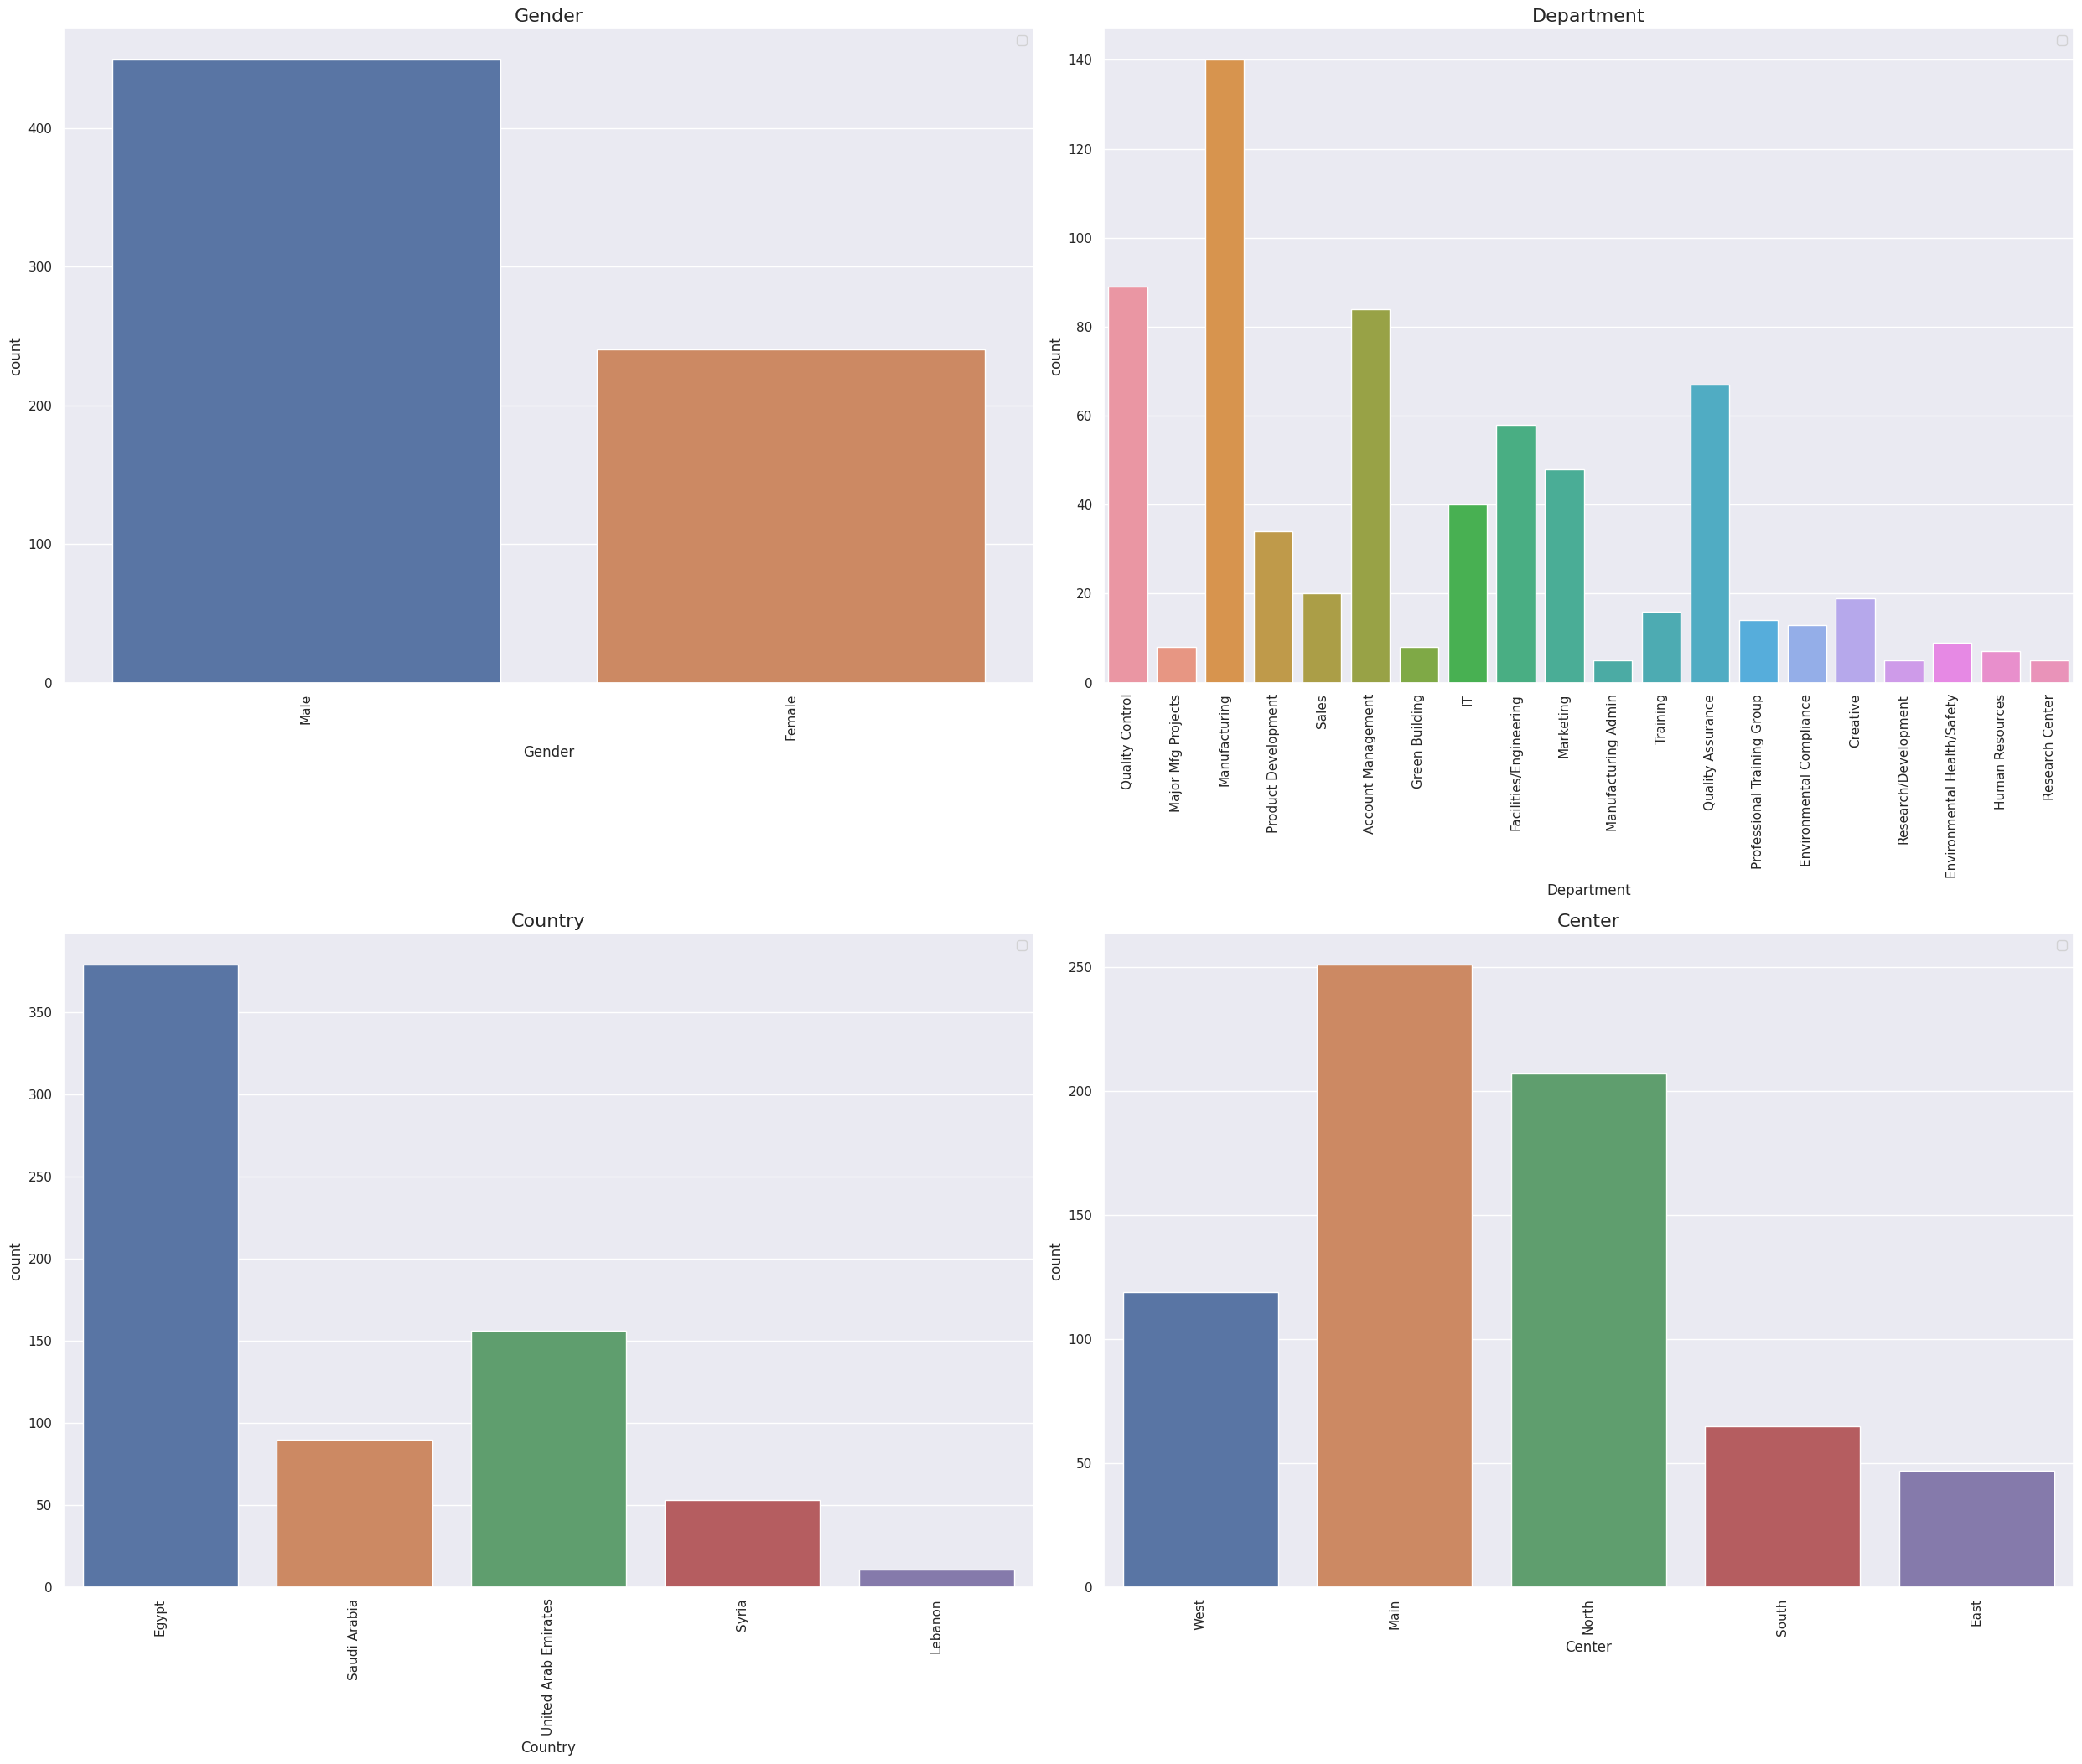

In [19]:
plt.figure(figsize=(25,30))

pltno=1

for i in cat_d[['Gender','Department','Country','Center']]:
    
    if pltno<=6:
        
        ax=plt.subplot(3,2,pltno)
        
        sns.countplot(x=cat_d[i])
        
        plt.xticks(rotation=90)
        
        plt.legend()
        
        plt.title(i, fontsize=16)
        
    pltno=pltno+1
    
    plt.tight_layout()

plt.show()

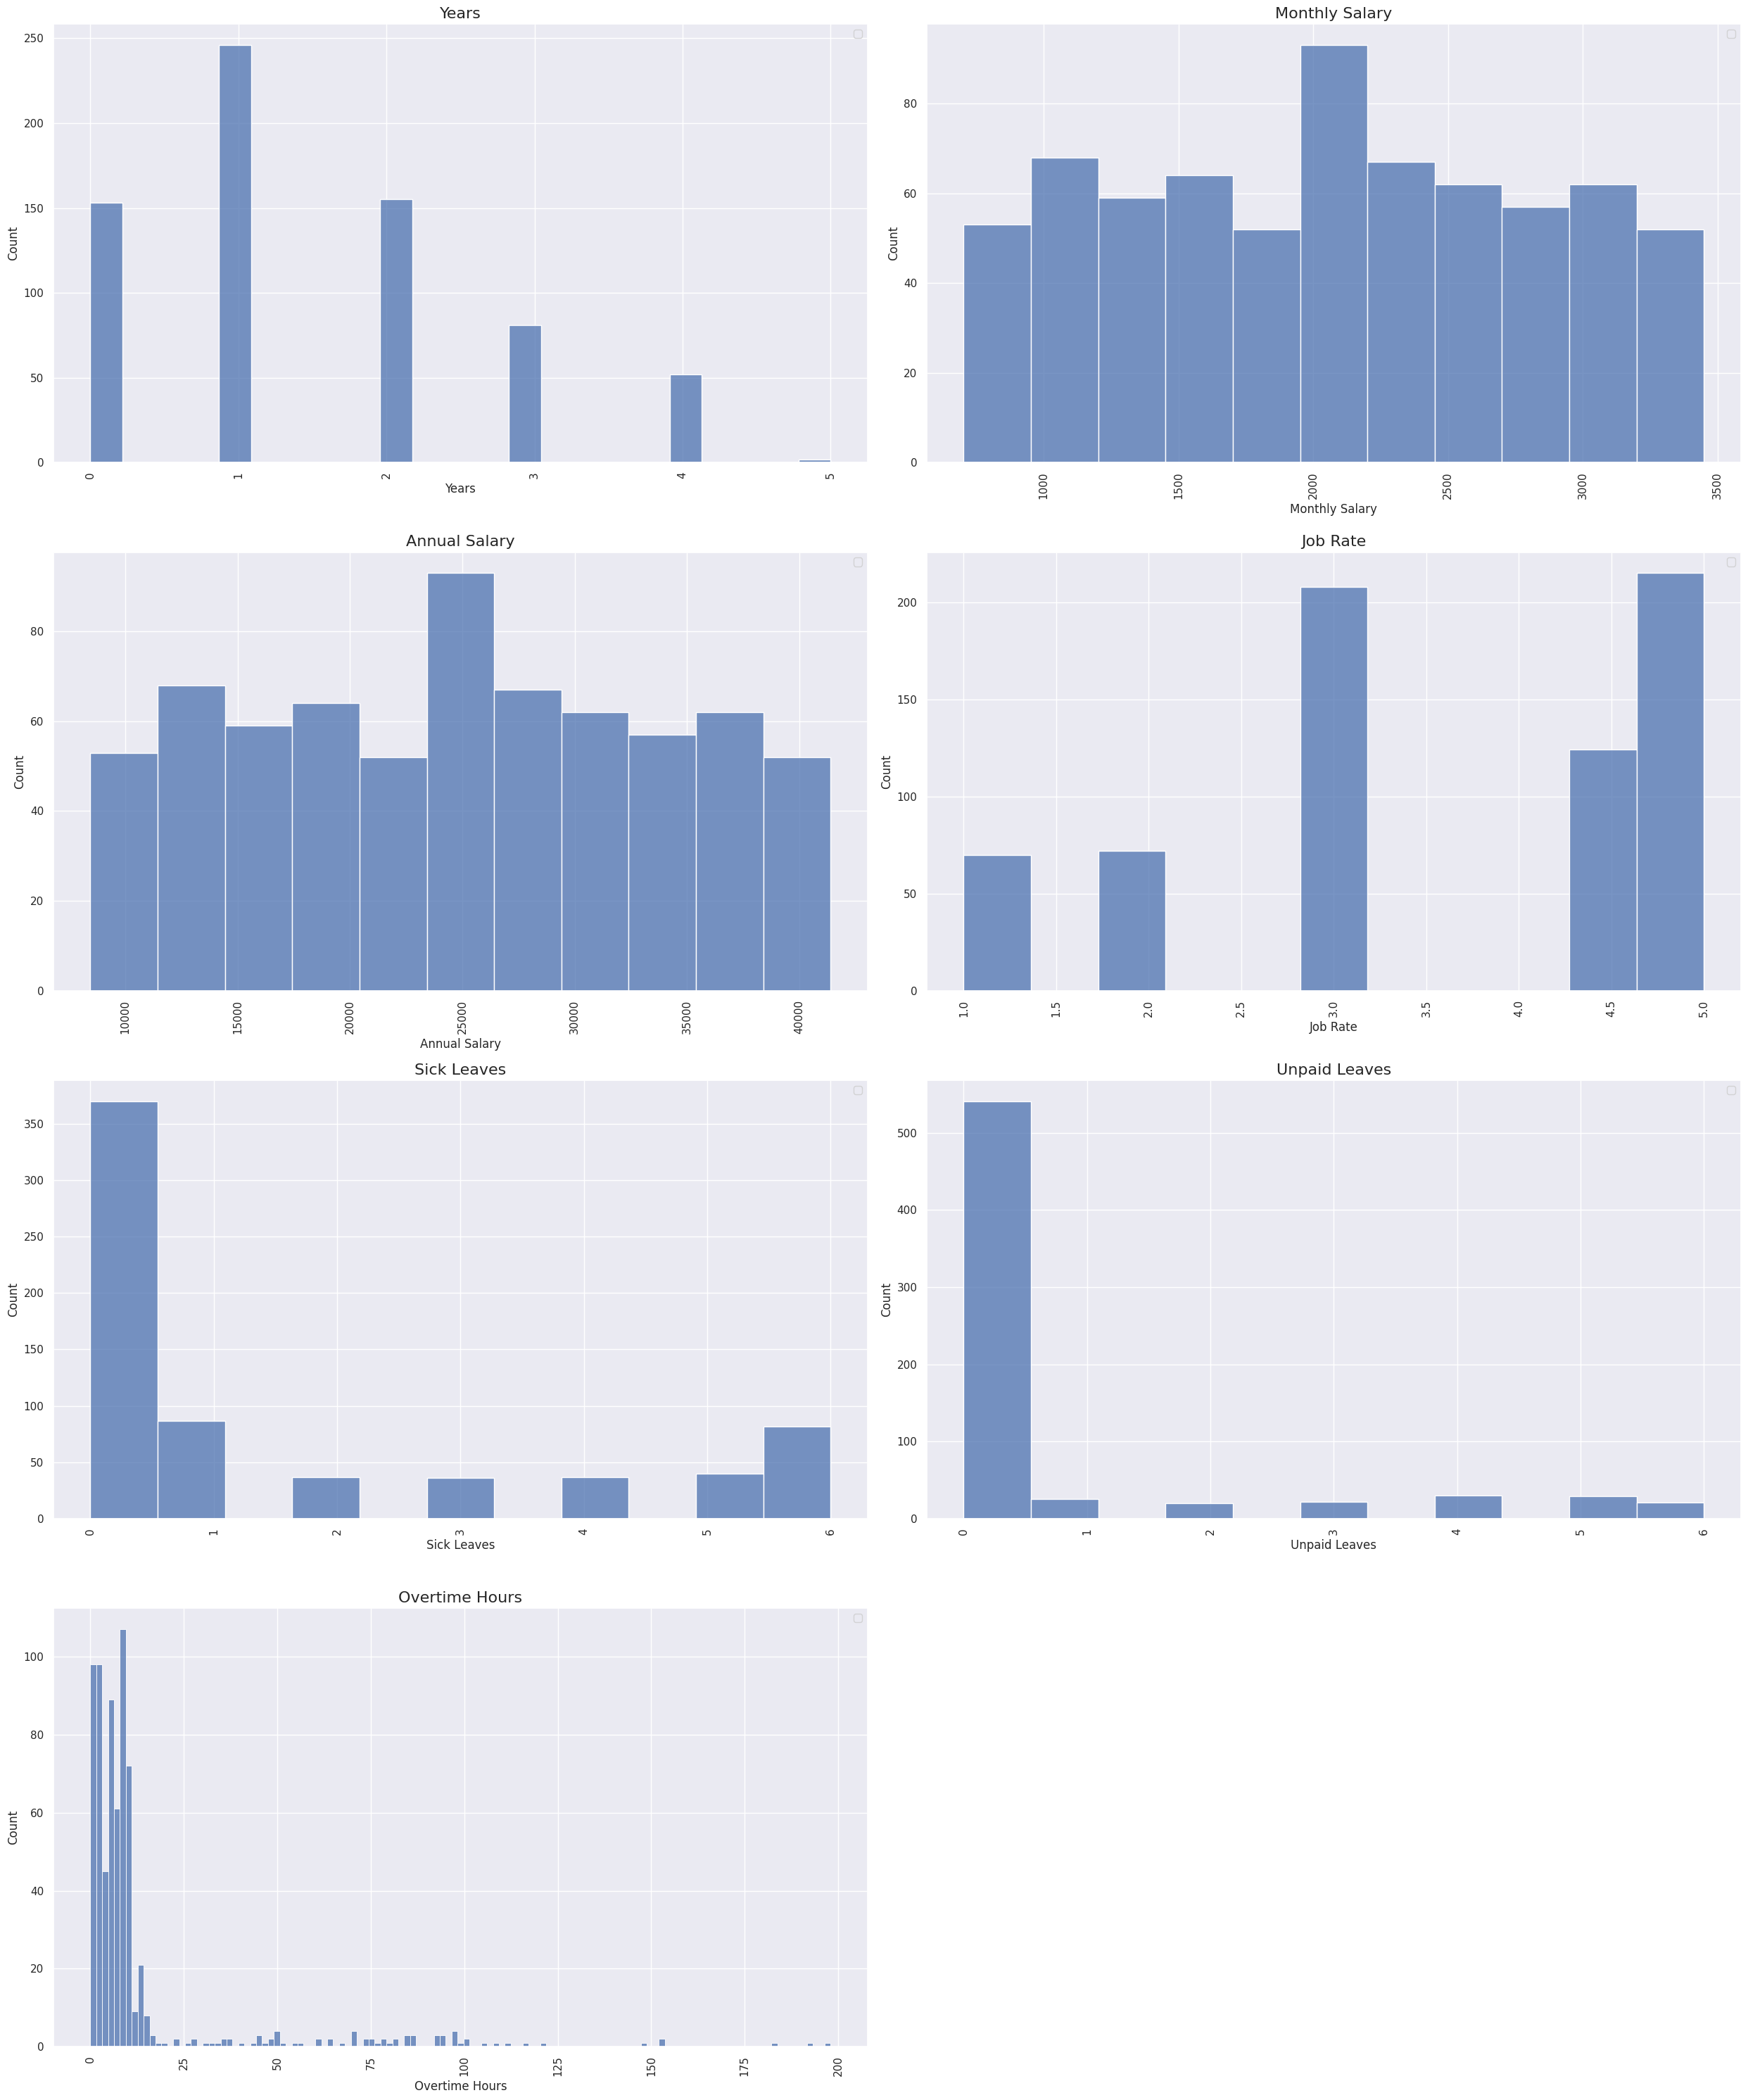

In [20]:
plt.figure(figsize=(25,30))

pltno=1

for i in num_d:
    
    if pltno<=7:
        
        ax=plt.subplot(4,2,pltno)
        
        sns.histplot(num_d[i])
        
        plt.xticks(rotation=90)
        
        plt.legend()
        
        plt.title(i, fontsize=16)
        
    pltno=pltno+1
    
    plt.tight_layout()

plt.show()

<Axes: xlabel='Start Date', ylabel='Annual Salary'>

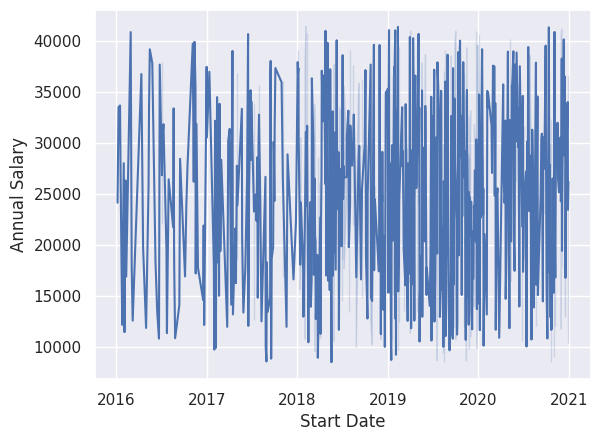

In [21]:
sns.lineplot(data=df,x='Start Date',y='Annual Salary')

In [22]:
df.columns

Index(['Gender', 'Start Date', 'Years', 'Department', 'Country', 'Center',
       'Monthly Salary', 'Annual Salary', 'Job Rate', 'Sick Leaves',
       'Unpaid Leaves', 'Overtime Hours', 'Name'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

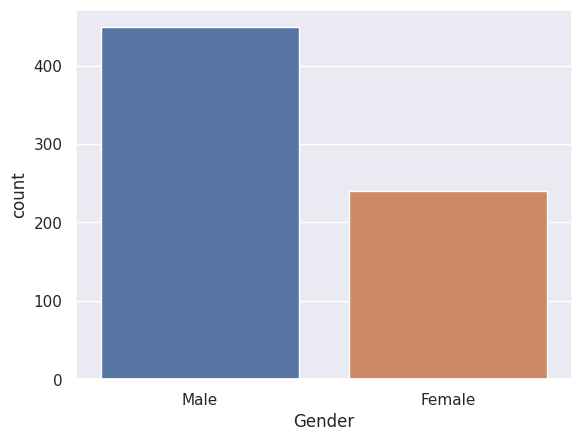

In [23]:
sns.countplot(data=df, x='Gender')

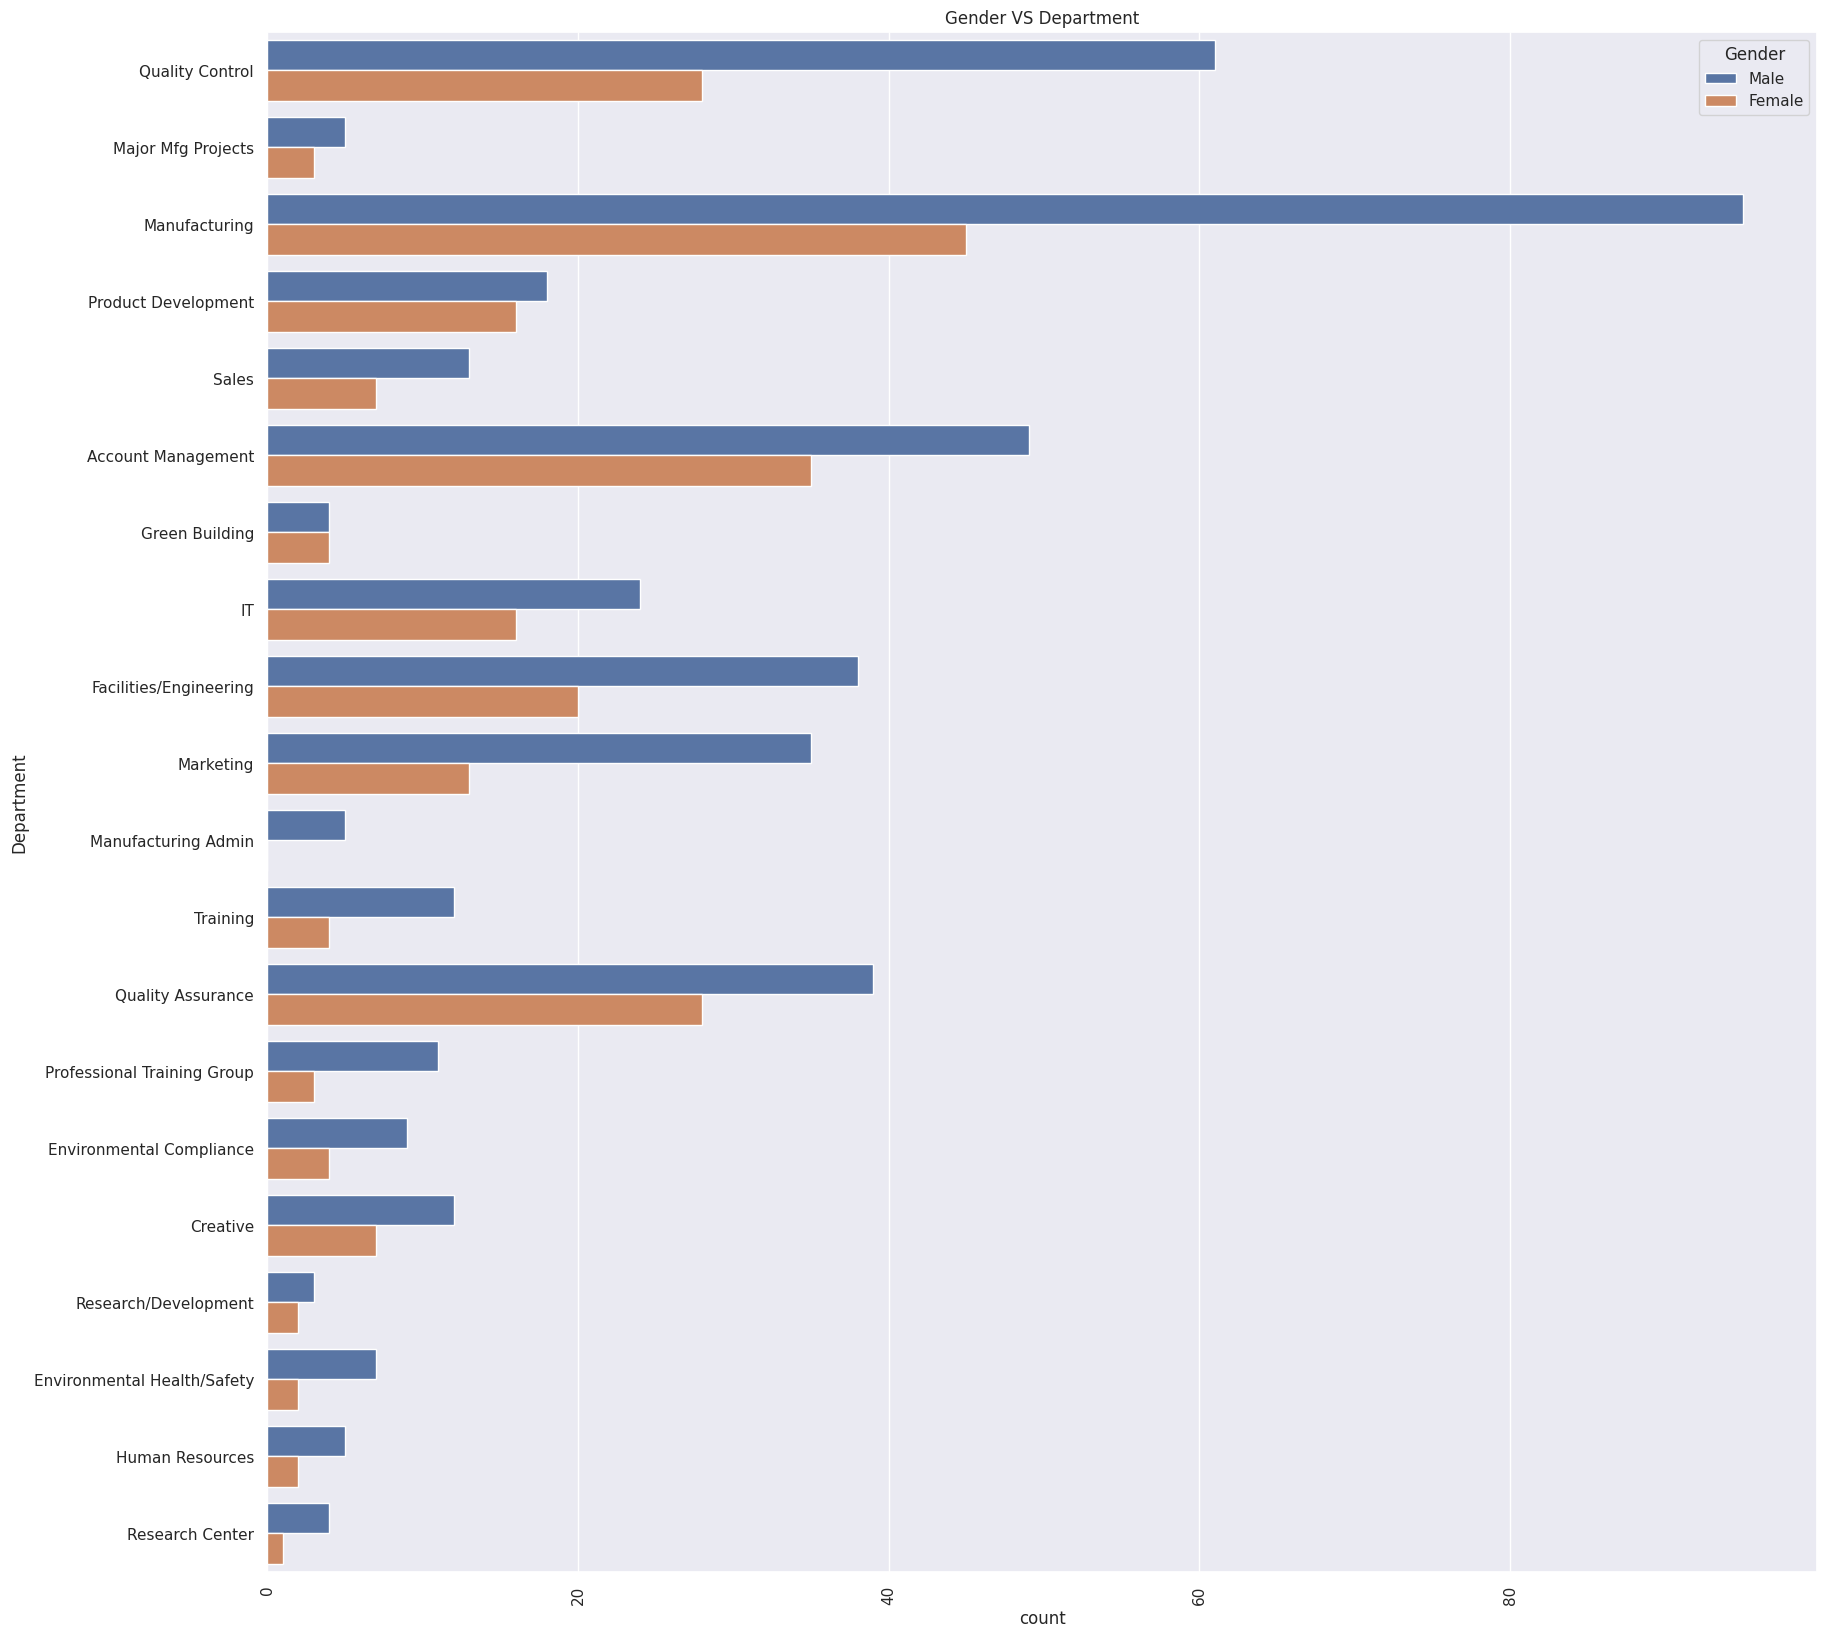

In [24]:
plt.figure(figsize=(20,20))

sns.countplot(data=df,y='Department',hue='Gender')

plt.xticks(rotation=90)

plt.title("Gender VS Department")

plt.show()